In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.2.4-tf'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

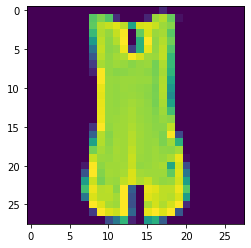

In [5]:
plt.imshow(X_train_full[4])

In [6]:

class_names =["shirt/tops","Trouser","Pullover","Dress","Coat","sandal","shirt","sneaker","bag","ankle boot"]

In [7]:
class_names[y_train_full[4]]

'shirt/tops'

In [8]:
class_names[y_train_full[1]]

'shirt/tops'

In [9]:
 X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

In [10]:
X_train_n = X_train_full /255
X_test_n = X_test /255 

In [11]:
X_valid,X_train = X_train_n[:5000],X_train_n[5000:]
y_valid , y_train = y_train_full[:5000],y_train_full[5000:]
X_test = X_test_n

In [12]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation = "relu"))
model.add(keras.layers.Dense(100,activation = "relu"))
model.add(keras.layers.Dense(10,activation = "softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


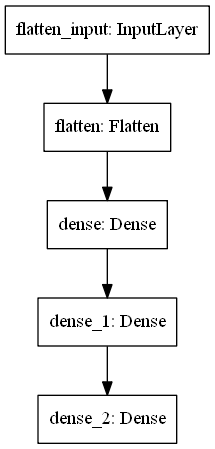

In [15]:
import pydot 
keras.utils.plot_model(model)

In [16]:
weights,biases = model.layers[1].get_weights()

In [17]:
weights


array([[ 0.02477466, -0.04884905, -0.01226706, ...,  0.01951506,
         0.05425297, -0.05122442],
       [-0.06215062, -0.01324658,  0.00374808, ...,  0.04910221,
        -0.02531387, -0.00386946],
       [-0.02827483,  0.05804734,  0.02249456, ..., -0.0146457 ,
        -0.00775469, -0.00675905],
       ...,
       [ 0.03310398, -0.04058462, -0.06192487, ..., -0.06343759,
        -0.03144239,  0.01189137],
       [ 0.04221951,  0.01413602, -0.07392057, ..., -0.05355622,
        -0.00628727,  0.00989327],
       [ 0.05130357,  0.03213764,  0.05330528, ..., -0.03117806,
        -0.05855303,  0.00175619]], dtype=float32)

In [18]:
weights.shape


(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape


(300,)

In [21]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "sgd",metrics = ["accuracy"])


In [22]:
model_history = model.fit(X_train,y_train,epochs = 30,
                          validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 11s 199us/sample - loss: 0.7140 - accuracy: 0.7664 - val_loss: 0.5179 - val_accuracy: 0.8242
Epoch 2/30
55000/55000 [==============================] - 9s 172us/sample - loss: 0.4886 - accuracy: 0.8275 - val_loss: 0.4396 - val_accuracy: 0.8450
Epoch 3/30
55000/55000 [==============================] - 11s 198us/sample - loss: 0.4433 - accuracy: 0.8452 - val_loss: 0.4124 - val_accuracy: 0.8602
Epoch 4/30
55000/55000 [==============================] - 10s 184us/sample - loss: 0.4157 - accuracy: 0.8539 - val_loss: 0.4076 - val_accuracy: 0.8598
Epoch 5/30
55000/55000 [==============================] - 11s 196us/sample - loss: 0.3962 - accuracy: 0.8609 - val_loss: 0.3832 - val_accuracy: 0.8712
Epoch 6/30
55000/55000 [==============================] - 11s 200us/sample - loss: 0.3801 - accuracy: 0.8657 - val_loss: 0.3973 - val_accuracy: 0.8566
Epoch 7/30
55000/55000 [======================

In [23]:
model_history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [24]:
model_history.history

{'loss': [0.7139663312001662,
  0.4885836031913757,
  0.4433260758486661,
  0.4156543526996266,
  0.3962049004988237,
  0.3801223761992021,
  0.3671849440748041,
  0.3561110160914334,
  0.3449637476314198,
  0.33492578594034367,
  0.32730826608050956,
  0.3196419097445228,
  0.31143708998073233,
  0.30483262664621524,
  0.2984326710863547,
  0.29244093579595737,
  0.28633340794173157,
  0.28087955521887,
  0.2745597063996575,
  0.27088813075694174,
  0.2658387104023587,
  0.2614951405395161,
  0.2562328500639309,
  0.2521362962245941,
  0.2472165185213089,
  0.24336323115392164,
  0.23965539995540272,
  0.23543010461005298,
  0.2324297857284546,
  0.2287995342157104],
 'accuracy': [0.7663818,
  0.8275091,
  0.8452182,
  0.8539091,
  0.8608909,
  0.8657454,
  0.86936367,
  0.8740909,
  0.87798184,
  0.88125455,
  0.8848364,
  0.8864727,
  0.88878185,
  0.89107275,
  0.8923636,
  0.8959636,
  0.89745456,
  0.89887273,
  0.90145457,
  0.9024182,
  0.9042909,
  0.90483636,
  0.908,
  0.908

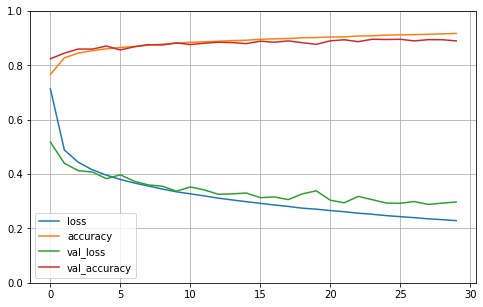

In [25]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [26]:
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3377129639029503, 0.8798]

In [27]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [28]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [29]:
np.array(class_names)[y_pred]

array(['ankle boot', 'Pullover', 'Trouser'], dtype='<U10')

AxesImage(54,36;334.8x217.44)


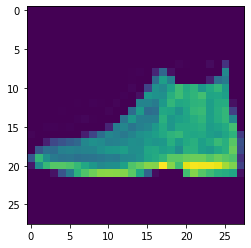

In [93]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


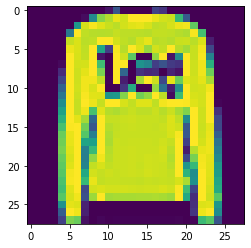

In [31]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


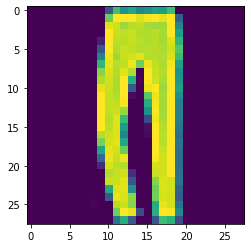

In [32]:
print(plt.imshow(X_test[2]))

Restoring Models and using Callbacks

In [37]:
model.save("my_Func_model.h5")

In [39]:
%pwd


'C:\\Users\\User'

In [65]:
del model

In [66]:
keras.backend.clear_session()

In [89]:
model = keras.models.load_model("my_Func_model.h5")

In [90]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [82]:
y_pred = model.predict(X_new)
print(y_pred)

ValueError: Error when checking input: expected dense_9_input to have shape (23, 24) but got array with shape (28, 28)

In [141]:
del model

In [142]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [147]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation = "relu",input_shape=[8]),
    keras.layers.Dense(30,activation = "relu"),
    keras.layers.Dense(1)
])

In [148]:
model.compile(loss ="mse" ,optimizer = keras.optimizers.SGD(lr=1e-3))

In [149]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02D}.h5")

In [107]:

history = model.fit(X_train,y_train,epochs = 10,
                   validation_data=(X_valid,y_valid
                    callbacks = [checkpoint_cb])

ValueError: Error when checking input: expected dense_input to have 3 dimensions, but got array with shape (55000, 28, 28, 1)